In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot


In [39]:
X1 = pd.read_csv("../Train.csv")
X1 = X1.values

X = X1[:,0:5]
Y = X1[:,5]

ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))

print(X.shape)
print(Y.shape)

df = pd.DataFrame(X1)
df.head()


def hypothesis(x,theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range (n):
        y_ += (theta[i]* x[i])
    return y_

def error(X,y,theta):
    error = 0.0
    m = X.shape[0]
    for i in range (m):
        y_ = hypothesis(X[i],theta)
        error += (y_ - y[i])**2
    return error/m
        

def gradient(X,y,theta):
    m,n = X.shape
    grad = np.zeros((n,))
    for j in range(n):
        for i in range(m):
                y_= hypothesis(X[i], theta)
                grad[j] += (y_ - y[i])*X[i][j]
    return grad/m  
        
def gradient_descent(X,y,learning_rate= 0.1,max = 300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range (max):
        e =  error(X,y,theta)
        error_list.append(e)
        grad = gradient(X,y,theta)
        for j in range (n):
            theta[j] = theta[j] - learning_rate*grad[j]
            
    return error_list,theta




(1600, 6)
(1600,)


[ 4.99096674 29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]
(1600, 6)
(6,)
[12256.130414032892, 9946.004173127018, 8088.610699167812, 6594.85142713289, 5393.231266256828, 4426.367991415778, 3648.196110709608, 3021.7266136529256, 2517.2517417468507, 2110.9060951328556, 1783.5131148407534, 1519.6601535538814, 1306.9566825025531, 1135.4392480411577, 997.0940439380543, 885.4737681101439, 795.3900760490453, 722.6666597127011, 663.9409557650622, 616.504869065604, 578.1768048152014, 547.1988305621522, 522.1540131745837, 501.8999565275401, 485.515351536561, 472.2569800983107, 461.5251195224693, 452.8356990069183, 445.7978845107527, 440.09602894086856, 435.47513363865977, 431.7291349453358, 428.691464317541, 426.2274386125706, 424.2281240161365, 422.6053868540312, 421.2879005864381, 420.21792333502066, 419.34869650824754, 418.64234420936987, 418.068176530977, 417.60131867981136, 417.22160303542097, 416.9126734479456, 416.66126090364844, 416.4565975975926, 416.28994282489975, 416.1

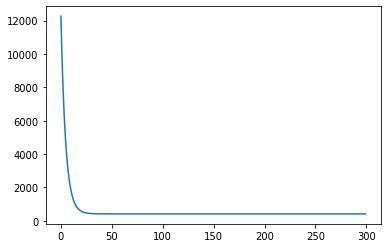

In [43]:
error_list,theta = gradient_descent(X,Y)
print(theta)
print(X.shape)
print(theta.shape)
print(error_list)
plot.plot(error_list)
plot.show()


In [61]:
y_ = []
for i in range(X.shape[0]):
    pred = hypothesis(X[i],theta)
    y_.append(pred)
y_ = np.array(y_)
y  = np.array(Y)
print(type(y_))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [49]:
def r2_score(Y,Y_):
    num = np.sum((Y-Y_)**2)
    denum = np.sum((Y-Y.mean())**2)
    score = 1 - (num/denum)
    return score*100

In [67]:
print(r2_score(y,y_))
y_test = pd.read_csv("../Test.csv")
Y_Test = y_test.values
print(Y_Test.shape)

ones = np.ones((Y_Test.shape[0],1))
Y_Test = np.hstack((ones,Y_Test))
print(Y_Test.shape)

# idx = []
# for i in range(Y_Test.shape[0]):
#     idx.append(i)


y_res = []
for i in range(Y_Test.shape[0]):
    pred = hypothesis(Y_Test[i],theta)
    y_res.append(pred)
df = pd.DataFrame(data = y_res , columns = ["target"])
df.to_csv('y_prediction2.csv', index = True)
    


96.60939669975616
(400, 5)
(400, 6)
